In [145]:
!pip install tweepy
!pip install textblob
!pip install pycountry
!pip install wordcloud
!pip install nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sudha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [146]:
# References:
# https://towardsdatascience.com/how-to-scrape-more-information-from-tweets-on-twitter-44fd540b8a1f
# https://medium.com/analytics-vidhya/fetch-tweets-using-their-ids-with-tweepy-twitter-api-and-python-ee7a22dcb845

### Read & Save Raw tweets

In [147]:
import os
import tweepy as tw
import pandas as pd

In [148]:
consumer_key= 'NrblJQ39ZvPLl69EaOg92HymT'
consumer_secret= 'JupK3xdr8WEECrBWszVDd1HhFgznbfghltji1pFYdOUhHiPU9k'
access_token= '1428909779926151176-LpcExBSfWczJ91flWZiV6YGNfAw4pX'
access_token_secret= 'wYsLw0dmG9V8SrVaeUsqwBp3FBYxuza2B0t8KuSpwaOEK'

In [149]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [150]:
# Define the search term and the date_since date as variables
search_words = "#airbnb"
date_since = "2021-1-1"

In [151]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since, tweet_mode="extended").items(2000)

# Pulling information from tweets iterable object.
# Add or remove tweet information you want in the below list comprehension.
tweets_list = [[tweet.full_text, tweet.created_at, tweet.id_str, tweet.user.screen_name] for tweet in tweets]
 
# Creation of dataframe from tweets_list.
# Add or remove columns as you remove tweet information.
tweets_df = pd.DataFrame(tweets_list,columns=['Tweet', 'Datetime', 'Id', 'Name'])


In [152]:
tweets_df

,Tweet,Datetime,Id,Name
0,RT @cottage_green: Custom Outdoor Signs by htt...,2021-09-02 06:24:57,1433314986902892546,AntonillaArt
1,RT @Morris_Aron: Get yourself a studio in Kili...,2021-09-02 06:23:26,1433314606215204865,PropertyDKe
2,And this is how it sounds inside the house. #B...,2021-09-02 06:16:18,1433312810373636097,MargieColes_Esq
3,I can say this: we’re getting Hurricane Ida le...,2021-09-02 06:16:00,1433312734792327170,MargieColes_Esq
4,How to add in you have a king beds on Airbnb\n...,2021-09-02 06:01:10,1433309004193742850,BoostlyUK
...,...,...,...,...
1939,We're back! $ABNB #VRBO #Airbnb #travel $SPY ...,2021-08-25 05:09:55,1430397002752290816,WorkaholicHouse
1940,@nathanblec @AirbnbPolicy @Airbnb #airbnb bann...,2021-08-25 04:53:24,1430392843709857795,raysaarinenkhan
1941,#AIRBNB #1ADDRESS #TOURISM + #BUSINESSTRAVEL ...,2021-08-25 04:47:25,1430391340299325440,BrazilAirbnbSP
1942,The great thing about an #Airbnb is that 90% o...,2021-08-25 01:55:17,1430348019963154439,StreakerMike


In [153]:
tweets_df.to_csv('RawData.csv')#, mode='a')

### Sentiment analysis
#### Reference: 
https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [154]:
df = pd.read_csv ('RawData.csv',sep=',')
del df['Unnamed: 0']
df

,Tweet,Datetime,Id,Name
0,RT @cottage_green: Custom Outdoor Signs by htt...,2021-09-02 06:24:57,1433314986902892546,AntonillaArt
1,RT @Morris_Aron: Get yourself a studio in Kili...,2021-09-02 06:23:26,1433314606215204865,PropertyDKe
2,And this is how it sounds inside the house. #B...,2021-09-02 06:16:18,1433312810373636097,MargieColes_Esq
3,I can say this: we’re getting Hurricane Ida le...,2021-09-02 06:16:00,1433312734792327170,MargieColes_Esq
4,How to add in you have a king beds on Airbnb\n...,2021-09-02 06:01:10,1433309004193742850,BoostlyUK
...,...,...,...,...
1939,We're back! $ABNB #VRBO #Airbnb #travel $SPY ...,2021-08-25 05:09:55,1430397002752290816,WorkaholicHouse
1940,@nathanblec @AirbnbPolicy @Airbnb #airbnb bann...,2021-08-25 04:53:24,1430392843709857795,raysaarinenkhan
1941,#AIRBNB #1ADDRESS #TOURISM + #BUSINESSTRAVEL ...,2021-08-25 04:47:25,1430391340299325440,BrazilAirbnbSP
1942,The great thing about an #Airbnb is that 90% o...,2021-08-25 01:55:17,1430348019963154439,StreakerMike


total number:  1944
positive number:  933
negative number:  313
neutral number:  698


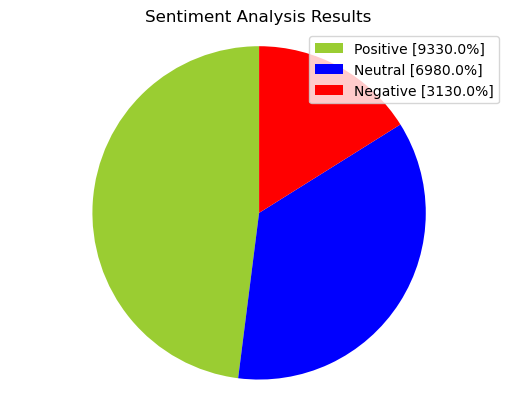

In [155]:
# Import Libraries
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0

tweet_list = []
user_list = []
id_list = []

neutral_list = []
negative_list = []
positive_list = []

# tweets = tweepy.Cursor(api.search, q="airbnb",tweet_mode="extended",lang="en").items(10)

for index, row in df.iterrows():
    
    tweet_list.append(row['Tweet'])
    analysis = TextBlob(row['Tweet'])
    
    score = SentimentIntensityAnalyzer().polarity_scores(row['Tweet'])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(row['Tweet'])
        negative += 1
    elif pos > neg:
        positive_list.append(row['Tweet'])
        positive += 1
    elif pos == neg:
        neutral_list.append(row['Tweet'])
        neutral += 1
        
noOfTweet = 10        
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
user_list = pd.DataFrame(user_list)
id_list = pd.DataFrame(id_list)

neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Results")
plt.axis('equal')
plt.show()

In [156]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity','subjectivity']] = df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df['Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
        df.loc[index, 'neg'] = neg
        df.loc[index, 'neu'] = neu
        df.loc[index, 'pos'] = pos
        df.loc[index, 'compound'] = comp


### Filter Negative reviews

In [157]:
df = df[df['sentiment']=='negative']

In [158]:
df

,Tweet,Datetime,Id,Name,sentiment,neg,neu,pos,compound
13,RT @barnstablewatch: This is #Airbnb. Cape Cod...,2021-09-02 03:56:12,1433277555591639048,missmira1122,negative,NaN,NaN,NaN,NaN
39,RT @hollyshortall: @jamierosedee @Airbnb @Airb...,2021-09-01 23:17:06,1433207317957328896,pixieeeebaby,negative,NaN,NaN,NaN,NaN
45,Guests struggle to get VRBO refunds amid Calif...,2021-09-01 22:38:33,1433197614053224452,Circle25495215,negative,NaN,NaN,NaN,NaN
46,RT @hollyshortall: @jamierosedee @Airbnb @Airb...,2021-09-01 22:32:06,1433195992912908295,AJPeace,negative,NaN,NaN,NaN,NaN
48,Can’t use #airbnb to rent out my property as w...,2021-09-01 22:12:59,1433191181459107849,senior_jim,negative,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1898,The TOP-3 risers on #Xtrade trading app!\n#Air...,2021-08-25 09:46:08,1430466512595210248,XTrade,negative,NaN,NaN,NaN,NaN
1912,RT @Bonn1eGreer: #Airbnb is offering temporary...,2021-08-25 09:06:25,1430456518869147648,32_ireland,negative,NaN,NaN,NaN,NaN
1916,#Afghanistan Crisis: #Airbnb to provide free h...,2021-08-25 08:50:00,1430452386859003905,allergytonews,negative,NaN,NaN,NaN,NaN
1933,Companies as large scale as Air BNB get away w...,2021-08-25 08:07:45,1430441754096975876,karmasan23,negative,NaN,NaN,NaN,NaN


### Retrieve replies for a given id/ negative review


In [159]:

# update these for the tweet you want to process replies to 'name' = the account username and you can find the tweet id within the tweet URL
name = 'missmira1122'
tweet_id = '1433277555591639048'

replies=[]
for tweet in tw.Cursor(api.search,q='to:'+name, result_type='recent', timeout=999999).items(1000):
    if hasattr(tweet, 'in_reply_to_status_id_str'):
        if (tweet.in_reply_to_status_id_str==tweet_id):
            replies.append(tweet.text)

replies

[]

In [160]:
# #This code creates the dataset from Corpus.csv which is downloadable from the
# #internet well known dataset which is labeled manually by hand. But for the text
# #of tweets you need to fetch them with their IDs.
# import tweepy
# import csv

# # This method creates the training set
# def createTrainingSet(corpusFile, targetResultFile):
#     import csv
#     import time

#     counter = 0
#     corpus = []

# #     with open(corpusFile, 'r') as csvfile:
# #         lineReader = csv.reader(csvfile, delimiter=',', quotechar="\"")
# #         for row in lineReader:
# #             corpus.append({"tweet_id": row[2], "label": row[1], "topic": row[0]})

#     sleepTime = 2
#     trainingDataSet = []

# #     for tweet in corpus:
# #         try:
# #             tweetFetched = api.get_status(tweet["tweet_id"])
# #             print("Tweet fetched" + tweetFetched.text)
# #             tweet["text"] = tweetFetched.text
# #             trainingDataSet.append(tweet)
# #             time.sleep(sleepTime)

# #         except:
# #             print("Inside the exception - no:2")
# #             continue

#     # Collect tweets
#     tweets = tw.Cursor(api.search,
#                   q=search_words,
#                   lang="en",
#                   since=date_since).items(2000)

#     airbnb_tweets = [[tweet.user.screen_name, tweet.user.location, tweet.id] for tweet in tweets]
    

#     with open(targetResultFile, 'w') as csvfile:
#         linewriter = csv.writer(csvfile, delimiter=',', quotechar="\"")
#         for tweet in trainingDataSet:
#             try:
#                 linewriter.writerow([tweet["tweet_id"], tweet["text"], tweet["label"], tweet["topic"]])
#             except Exception as e:
#                 print(e)
#     return trainingDataSet

# # Code starts here
# # This is corpus dataset
# corpusFile = "datasets/corpus.csv"
# # This is my target file
# targetResultFile = "datasets/targetResultFile.csv"
# # Call the method
# resultFile = createTrainingSet(corpusFile, targetResultFile)